In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
X1, y1 = make_blobs(n_samples=100,
                    n_features=2,
                    centers=1,
                    center_box=(2.0, 2.0),
                    cluster_std=0.75,
                    random_state=69)

X2, y2 = make_blobs(n_samples=100,
                    n_features=2,
                    centers=1,
                    center_box=(3.0, 3.0),
                    cluster_std=0.75,
                    random_state=69)

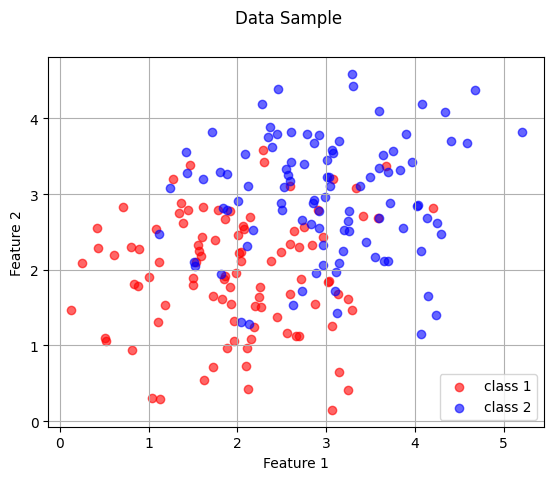

In [6]:
fig = plt.figure()
fig.suptitle("Data Sample")
plt.scatter(X1[:, 0], X1[:, 1], c='red', linewidths = 1, alpha=0.6, label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], c='blue', linewidths = 1, alpha=0.6, label="class 2")
plt.xlabel('Feature 1', fontsize=10)
plt.ylabel('Feature 2', fontsize=10)
plt.grid(True, axis='both')
plt.legend(loc='lower right')
plt.show()



In [9]:
# รวมข้อมูล
X = np.vstack((X1, X2))
y = np.hstack((y1, y2 + 1))  # เพิ่ม label ให้แตกต่างกัน (y2 = 1)

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# สร้าง Neural Network แบบ Linear
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # Linear Classifier
])

# คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5472 - loss: 1.6597
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4613 - loss: 1.6370 
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4803 - loss: 1.3281 
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4549 - loss: 1.0551 
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4840 - loss: 0.8027 
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5841 - loss: 0.6400 
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5645 - loss: 0.6364 
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6213 - loss: 0.6241 
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6242 - loss: 0.6360 
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6704 - loss: 0.5988 
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6262 - loss: 0.6156 
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

In [15]:
# ประเมินผล
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5378
Test Accuracy: 0.8000


In [16]:
# ฟังก์ชันสำหรับ plot decision boundary
def plot_decision_boundary(model, X, y):
    # สร้าง mesh grid สำหรับการทำนาย
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # ทำนายค่าจากโมเดล
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu, levels=[0, 0.5, 1])
    
    # Plot จุดข้อมูล
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdBu)
    plt.title("Decision Boundary (Linear)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

10373/10373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step


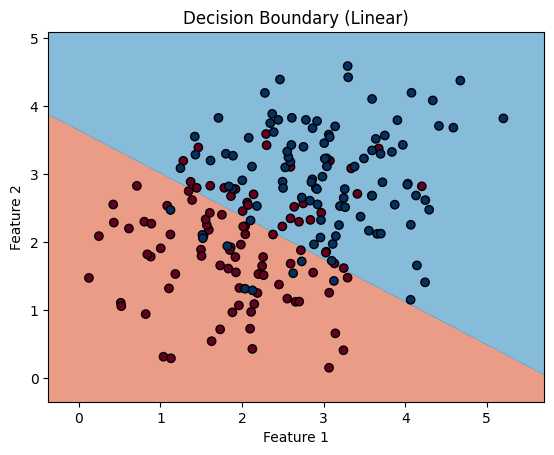

In [17]:
# เรียกฟังก์ชัน plot
plot_decision_boundary(model, X, y)